In [41]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as plt


In [29]:
df = pd.read_csv("data/big mac data.csv" , parse_dates= ["date"] )
df.head()


,date,iso_a3,currency_code,name,local_price,dollar_ex,dollar_price,GDP_dollar,adj_price,USD,EUR,GBP,JPY,CNY
0,2011-07-01,ARG,ARS,Argentina,20.00,4.132500,4.839685,9138.177,3.149757,1.01089,0.47526,0.84970,0.90626,0.94622
1,2011-07-01,AUS,AUD,Australia,4.56,0.922382,4.943724,55589.549,5.792526,0.11695,-0.18056,0.02742,0.05883,0.08103
2,2011-07-01,BRA,BRL,Brazil,9.50,1.541600,6.162429,10816.487,3.245241,1.48516,0.82320,1.28595,1.35584,1.40524
3,2011-07-01,GBR,GBP,Britain,2.39,0.614137,3.891637,36119.846,4.684831,0.08714,-0.20243,0.00000,0.03058,0.05218
4,2011-07-01,CAN,CAD,Canada,4.73,0.945850,5.000793,46214.914,5.259173,0.24443,-0.08704,0.14468,0.17968,0.20441


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812 entries, 0 to 811
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           812 non-null    datetime64[ns]
 1   iso_a3         812 non-null    object        
 2   currency_code  812 non-null    object        
 3   name           812 non-null    object        
 4   local_price    812 non-null    float64       
 5   dollar_ex      812 non-null    float64       
 6   dollar_price   812 non-null    float64       
 7   GDP_dollar     812 non-null    float64       
 8   adj_price      812 non-null    float64       
 9   USD            812 non-null    float64       
 10  EUR            812 non-null    float64       
 11  GBP            812 non-null    float64       
 12  JPY            812 non-null    float64       
 13  CNY            812 non-null    float64       
dtypes: datetime64[ns](1), float64(10), object(3)
memory usage: 88.9+ KB


In [31]:
df=df[(df["date"].dt.year==2019) & (df["date"].dt.month==1)]
df.head()


,date,iso_a3,currency_code,name,local_price,dollar_ex,dollar_price,GDP_dollar,adj_price,USD,EUR,GBP,JPY,CNY
554,2019-01-01,ARG,ARS,Argentina,75.00,37.455000,2.002403,14462.920,3.165211,-0.41927,-0.43420,-0.33846,-0.26107,-0.39584
555,2019-01-01,AUS,AUD,Australia,6.10,1.401640,4.352045,55692.730,4.945273,-0.19215,-0.21292,-0.07974,0.02791,-0.15955
556,2019-01-01,BRA,BRL,Brazil,16.90,3.717950,4.545516,9895.765,2.968028,0.40586,0.36972,0.60148,0.78883,0.46259
557,2019-01-01,GBR,GBP,Britain,3.19,0.783208,4.072992,39800.274,4.259130,-0.12215,-0.14472,0.00000,0.11698,-0.08673
558,2019-01-01,CAN,CAD,Canada,6.77,1.331400,5.084873,45094.605,4.487708,0.04012,0.01338,0.18485,0.32346,0.08209


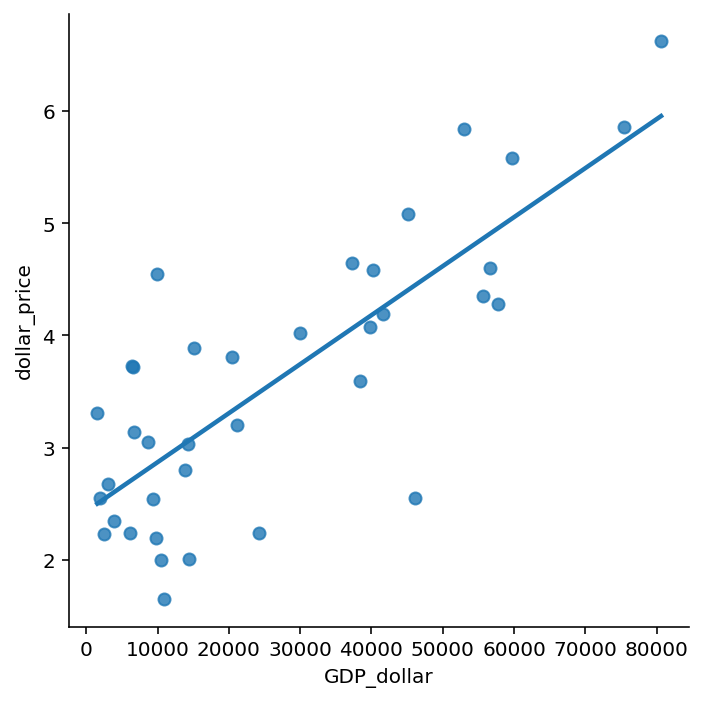

In [48]:
sns.lmplot(x="GDP_dollar" , y="dollar_price" , data=df, ci=None)

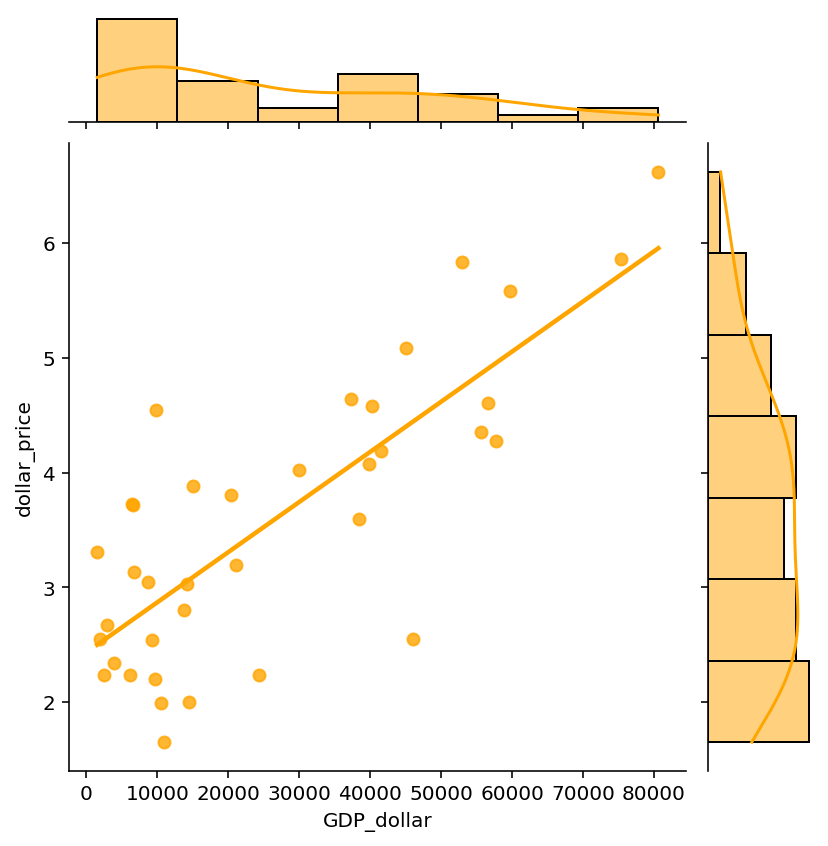

In [49]:
sns.jointplot(x="GDP_dollar" , y="dollar_price", data=df, kind="reg", ci=None, color="orange")

In [50]:
from sklearn.linear_model import LinearRegression

In [54]:
model = LinearRegression()

LinearRegression()

In [59]:
X=df[['GDP_dollar']]
y=df.dollar_price


In [60]:
model.fit(x,y)

LinearRegression()

In [61]:
model.intercept_

2.432727161471293

In [62]:
model.coef_

array([4.36961383e-05])

In [68]:
model.intercept_ + model.coef_ *9000


array([2.82599241])

In [69]:
model.predict([[9000]])

array([2.82599241])

# Statmodels : Simple linear Regression

In [64]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [66]:
model_a = smf.ols(formula="dollar_price ~ GDP_dollar",data=df).fit()

In [67]:
print(model_a.summary())

                            OLS Regression Results                            
Dep. Variable:           dollar_price   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     59.92
Date:                Sun, 23 Jan 2022   Prob (F-statistic):           4.34e-09
Time:                        04:32:11   Log-Likelihood:                -41.445
No. Observations:                  37   AIC:                             86.89
Df Residuals:                      35   BIC:                             90.11
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.4327      0.195     12.479      0.0